# Project Description


Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.



# Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.



Loan Data Set
When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
2. Loan rejected:The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Business Objective 

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

#  Importing Necessary Packages

In [ ]:
#Importing the Necessary Libraries for EDA

import pandas as pd
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.options.display.max_seq_items = 2000



In [2]:
#Loading the Loans dataset 

loans = pd.read_csv('loan.csv')

#  DATA UNDERSTANDING & CLEANING


#### There are Quite huge number of columns present in dataset ( 111 Columns ), all these are not required for analysis as they possess either null/nan, Hence its better to get rid of these columns*

In [3]:
# Identifying the columns to be dropped
cols = loans.columns.to_list()
to_be_dropped = list()
for each_column in cols:
    if loans[each_column].isna().all():
        to_be_dropped.append(each_column)

to_be_dropped.extend(['url','desc', 'pymnt_plan','addr_state', 'zip_code', 'addr_state', 'title','member_id' ])

In [4]:
    #Dropping the Columns 
print(f'Dropping Columns from the dataset :: {to_be_dropped}')
loans = loans.drop(columns=to_be_dropped)


Dropping Columns from the dataset :: ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'to

##### *1.2. Identifying the Duplicates based on the member ID*


In [5]:
# Duplicates Identification 
dups_count = loans[loans.duplicated(['id'])]
print(f'Found {dups_count} Duplicates')
    

Found Empty DataFrame
Columns: [id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 50 columns] Duplicates


##### *1.3. Standardize column Data*

In [6]:
# Standardizing the Column Data : Int_rate 

loans['int_rate'] = loans['int_rate'].apply(lambda x: x.replace('%',''))

# Standardizing the Column Data : term 
loans['term'] = loans['term'].apply(lambda x: x.rstrip('months')).astype('int')

# Standardizing the Column Data : emp_length 
loans['emp_length'] = loans['emp_length'].str.extract('(\d+)')


In [7]:
loans.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


##### 1.4. Inspecting Missing Values 

In [8]:
# Identifying the Missing Values  in Various Columns
def get_missing(df):
    """ 
    Description : Identifies the missing values in each column with some additional attributed like unique, missing etc
    in much more readable format
    
    """
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output


get_missing(loans)

,variable,dtype,count,unique,missing,pc_missing
0,id,int64,39717,39717,0,0.00
1,loan_amnt,int64,39717,885,0,0.00
2,funded_amnt,int64,39717,1041,0,0.00
3,funded_amnt_inv,float64,39717,8205,0,0.00
4,term,int64,39717,2,0,0.00
5,int_rate,object,39717,371,0,0.00
6,installment,float64,39717,15383,0,0.00
7,grade,object,39717,7,0,0.00
8,sub_grade,object,39717,35,0,0.00
9,emp_title,object,39717,28821,2459,6.19


In [9]:
#Dropping the columns which has most values missing 
loans.drop(columns=['mths_since_last_delinq', 'next_pymnt_d', 'mths_since_last_record'], inplace=True)

In [10]:
print(loans.isnull().all(axis=0).sum())


0


In [11]:
# To Indentify the data types of each column
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  int64  
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

In [44]:
#Converting the Columns to Numeric 
loans[['funded_amnt_inv', 'int_rate','installment', 'annual_inc', 'dti','emp_length', 'total_pymnt'] ] = loans[['funded_amnt_inv', 'int_rate','installment', 'annual_inc', 'dti', 'emp_length','total_pymnt'] ].apply(pd.to_numeric)

[Text(0, 0, '82.96%'), Text(0, 0, '14.17%'), Text(0, 0, '2.87%')]

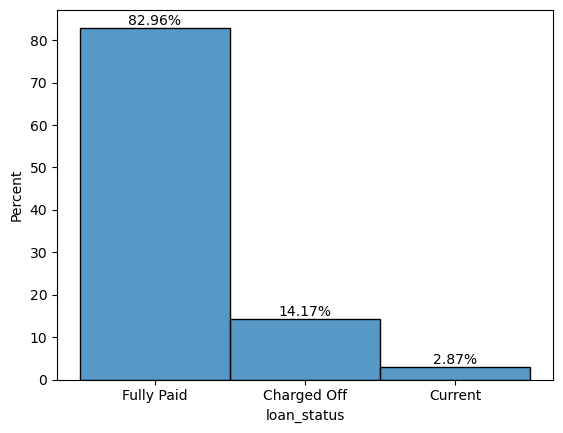

In [13]:
#Plot a Distribution to see the defaulters 
ax = sns.histplot(data=loans, x="loan_status",discrete=True, kde=False, stat='percent', legend=True , palette=['green', 'red', 'blue'])
ax.bar_label(ax.containers[0], fmt='%.2f%%')


In [14]:
#Plot a Distribution to see the defaulters 
loans.loan_status.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Fully Paid     83.0%
Charged Off    14.2%
Current         2.9%
Name: loan_status, dtype: object

#### Cannot make any decisions on the existing loan which are has the loan status as Current, hence excluding that.

In [15]:
loans['loan_status'] = loans['loan_status'].astype(str)


In [16]:
loans = loans[loans['loan_status'] != 'Current' ]

In [17]:
loans['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

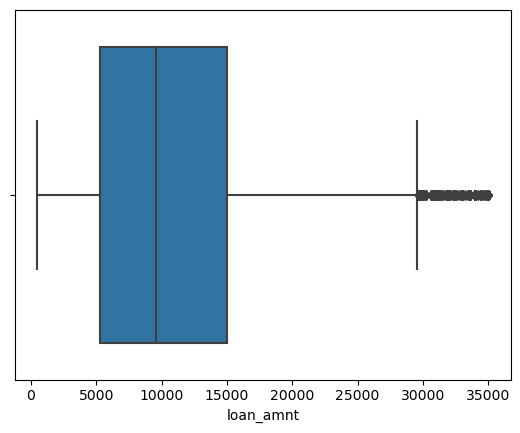

In [18]:
#Plottinh Box Plot to see any outliers
sns.boxplot(x='loan_amnt', data=loans)

In [19]:
loans.shape

(38577, 47)

In [20]:
# There are too many outliers and difference in mean and median

# Hence Limiting the loans to 95th Percentile 

loans = loans[loans['loan_amnt'] <= loans['loan_amnt'].quantile(0.95)]

In [21]:
loans.shape

(37142, 47)

##### Observation =>  14.2% of are defaulters 

## 2. DATA ANALYSIS

### 2.1 Univariate Analysis 

- Quantative Variables : loan_amnt, funded_amnt, installment,int_rate,emp_length,dti ,total_pymnt, annual_inc 
- Un Ordered Categorical Variable - term, loan_status, Purpose, grade, home ownership

In [22]:
loans.application_type.value_counts()

INDIVIDUAL    37142
Name: application_type, dtype: int64

In [23]:

# Univariate Analysis on Variable : Debit to Income ration
# Plot a box Hist to see
loans.pub_rec_bankruptcies.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

#Observation  :: 4.3% of loan takes have the bankrupt

0.0    95.6%
1.0     4.4%
2.0     0.0%
Name: pub_rec_bankruptcies, dtype: object

In [24]:
univariate_columns = ['loan_amnt', 'funded_amnt','term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'dti', 'verification_status', 'loan_status', 'total_pymnt', 'annual_inc', 'purpose', 'revol_bal']


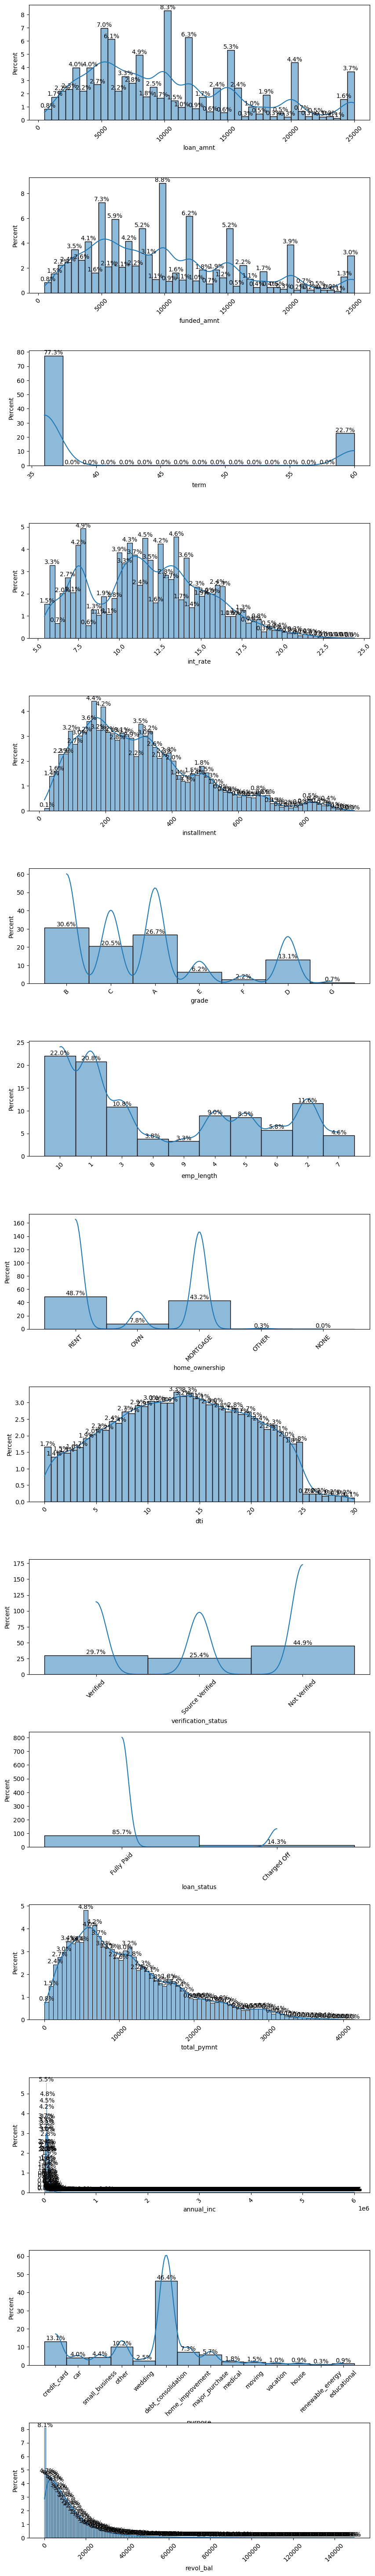

In [25]:
plt.figure(figsize=(10,80))
plt.subplots_adjust(hspace = 0.5)
index = 1
for col in univariate_columns:
    plt.subplot(16,1,index)
    ax = sns.histplot(x=col, data=loans, stat='percent', kde=True, legend=True)
    ax.bar_label(ax.containers[0], fmt='%.1f%%')

    index = index + 1
    plt.xticks(rotation = 45)

##### Observation from Univariate Analysis  
 - Most of the loans has been offered at interest from 12% to 15% 
 - 14.17% of total Loans are Charged Off
 - When the Loan Amount Increases then the Total Payment is decreased
 - There are quite considerable number of Loans which are Not Verified which requires Further analysis
 - dti ratio is acceptable , where the Debt to Income is not making big impact 
 - Employess with more exprience is taking more loans
 - home_ownership  with RENT and MORTGAGE were taking more loans
 - More loans were being taken for Debit Consolidation 
 - All the loans taken with either tenure of 36 or 60 months 
 - Tops Grades were taking more loans ( A, B C )
 

### 2.2 Segmented Univariate Analysis 
- Need to perform segmentation on the below variables 
        - issue_date
        

- Quantative Variables : loan_amnt, funded_amnt, installment,int_rate,emp_length,dti ,total_pymnt, annual_inc 
- Un Ordered Categorical Variable - term, loan_status, Purpose, grade, home ownership

In [26]:
#Segmenting the Issue Date  to get Month and Year 
loans.issue_d = pd.to_datetime(loans.issue_d, format='%b-%y')
loans['year']=loans['issue_d'].dt.year
loans['month']=loans['issue_d'].dt.month

<AxesSubplot:xlabel='year', ylabel='Count'>

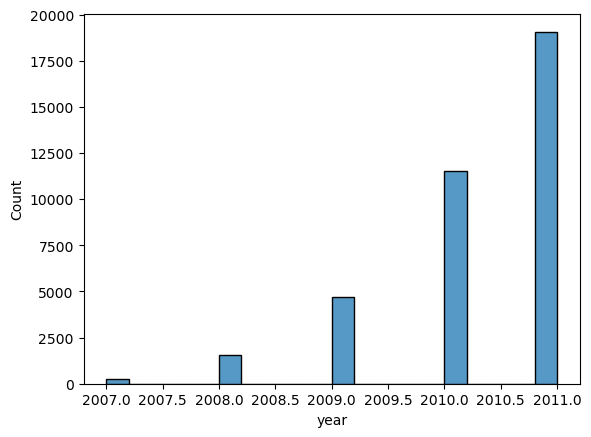

In [27]:
#Plot Univariate for Numerical variable 
sns.histplot(x='year', data=loans, bins=20)

<AxesSubplot:xlabel='month', ylabel='Count'>

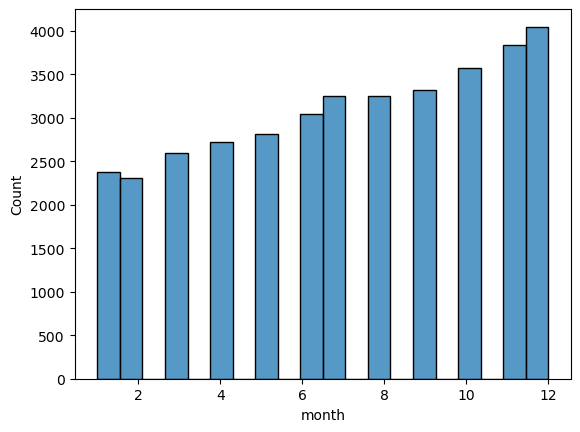

In [28]:
#Plot Univariate for Numerical variable 

sns.histplot(x='month', data=loans, bins=20)

##### Observation from Segmented Univariate Analysis  
- There is a increase in Number of loans each year  from Q1 to Q4 FISCAL
 

### 2.2 Bi-variate Analysis 

###### Derived Metrics
- Now we will look into the bi variate analysis w.r.t loan_status against  different categorical and Numerical Variables  and derive some insights

In [29]:
# categorise loan amounts into buckets , 
loans['loan_amount_category'] = pd.cut(loans['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '35000+'])



In [30]:
# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loans['annual_income_category'] = pd.cut(loans['annual_inc'], [0, 20000, 40000, 60000, 80000,100000, 500000, 1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-500000', '500000-1000000+'])



In [31]:
# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loans['int_rate_category'] = pd.cut(loans['int_rate'], [0, 10, 12.5, 16, 20, 24], labels=['0-10', '10-13', '12.5-16', '16-20', '20+'])


In [32]:

# categorise dti into buckets for bivariate analysis.
loans['dti_category'] = pd.cut(loans['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

<AxesSubplot:xlabel='dti_category', ylabel='Count'>

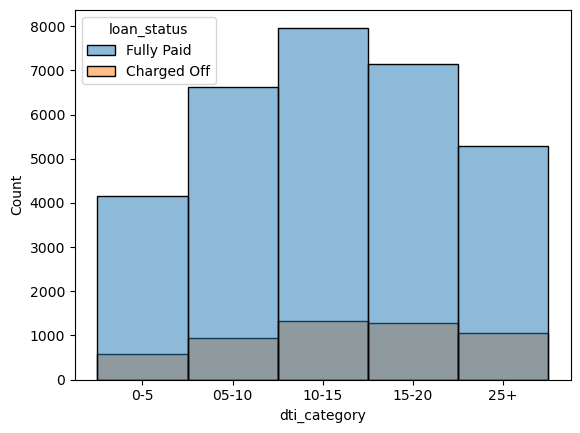

In [33]:
sns.histplot(data=loans, x='dti_category',hue='loan_status', stat='count')

<AxesSubplot:xlabel='int_rate_category', ylabel='Count'>

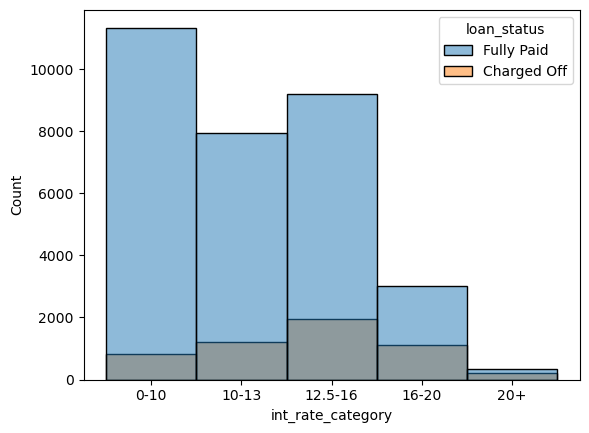

In [34]:
sns.histplot(data=loans, x='int_rate_category',hue='loan_status', stat='count', legend=True)

<AxesSubplot:xlabel='dti_category', ylabel='Count'>

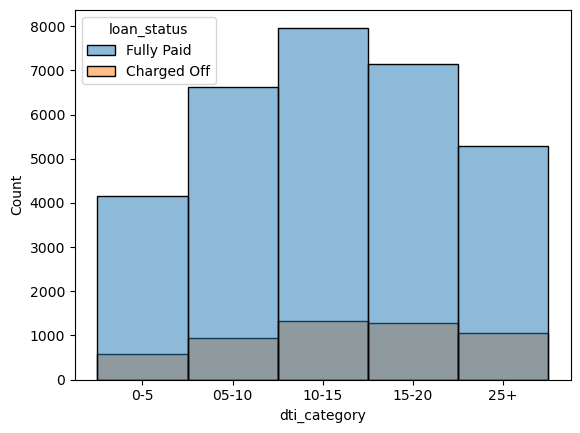

In [35]:
sns.histplot(data=loans, x='dti_category',hue='loan_status', stat='count')

In [38]:
bivariate_columns = ['loan_amnt', 'int_rate', 'installment', 'emp_length', 'year','dti', 'total_pymnt', 'annual_inc', 'revol_bal']


In [42]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37142 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          37142 non-null  int64         
 1   loan_amnt                   37142 non-null  int64         
 2   funded_amnt                 37142 non-null  int64         
 3   funded_amnt_inv             37142 non-null  float64       
 4   term                        37142 non-null  int64         
 5   int_rate                    37142 non-null  float64       
 6   installment                 37142 non-null  float64       
 7   grade                       37142 non-null  object        
 8   sub_grade                   37142 non-null  object        
 9   emp_title                   34859 non-null  object        
 10  emp_length                  36132 non-null  object        
 11  home_ownership              37142 non-null  object    

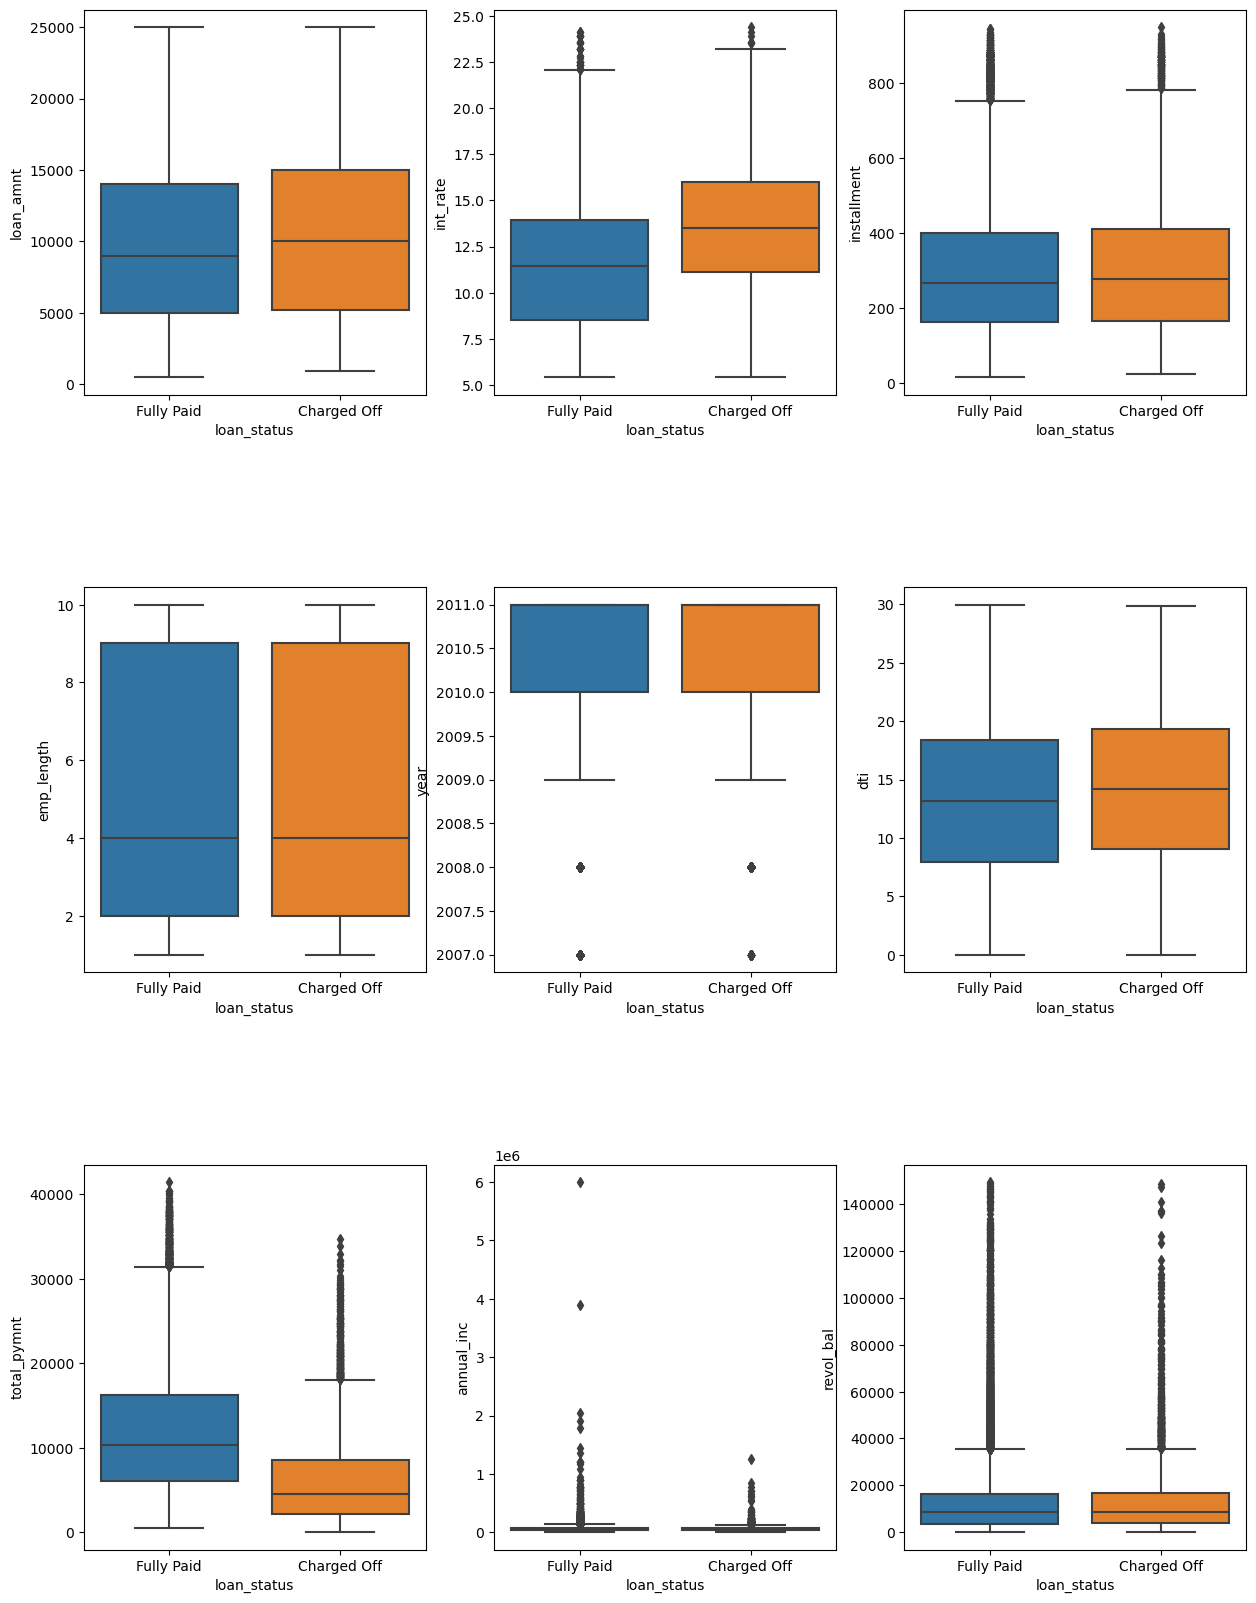

In [45]:
# Subplots [boxplot Plot] for bi variant analysis for all numerical variables against Loan_status 
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace = 0.5)
i = 1
for col in bivariate_columns:
    plt.subplot(3,3,i)
    sns.boxplot(x='loan_status',y=col, data=loans)
    #ax.bar_label(ax.containers[0], fmt='%.1f%%')
    i = i + 1
    #plt.xticks(rotation = 45)

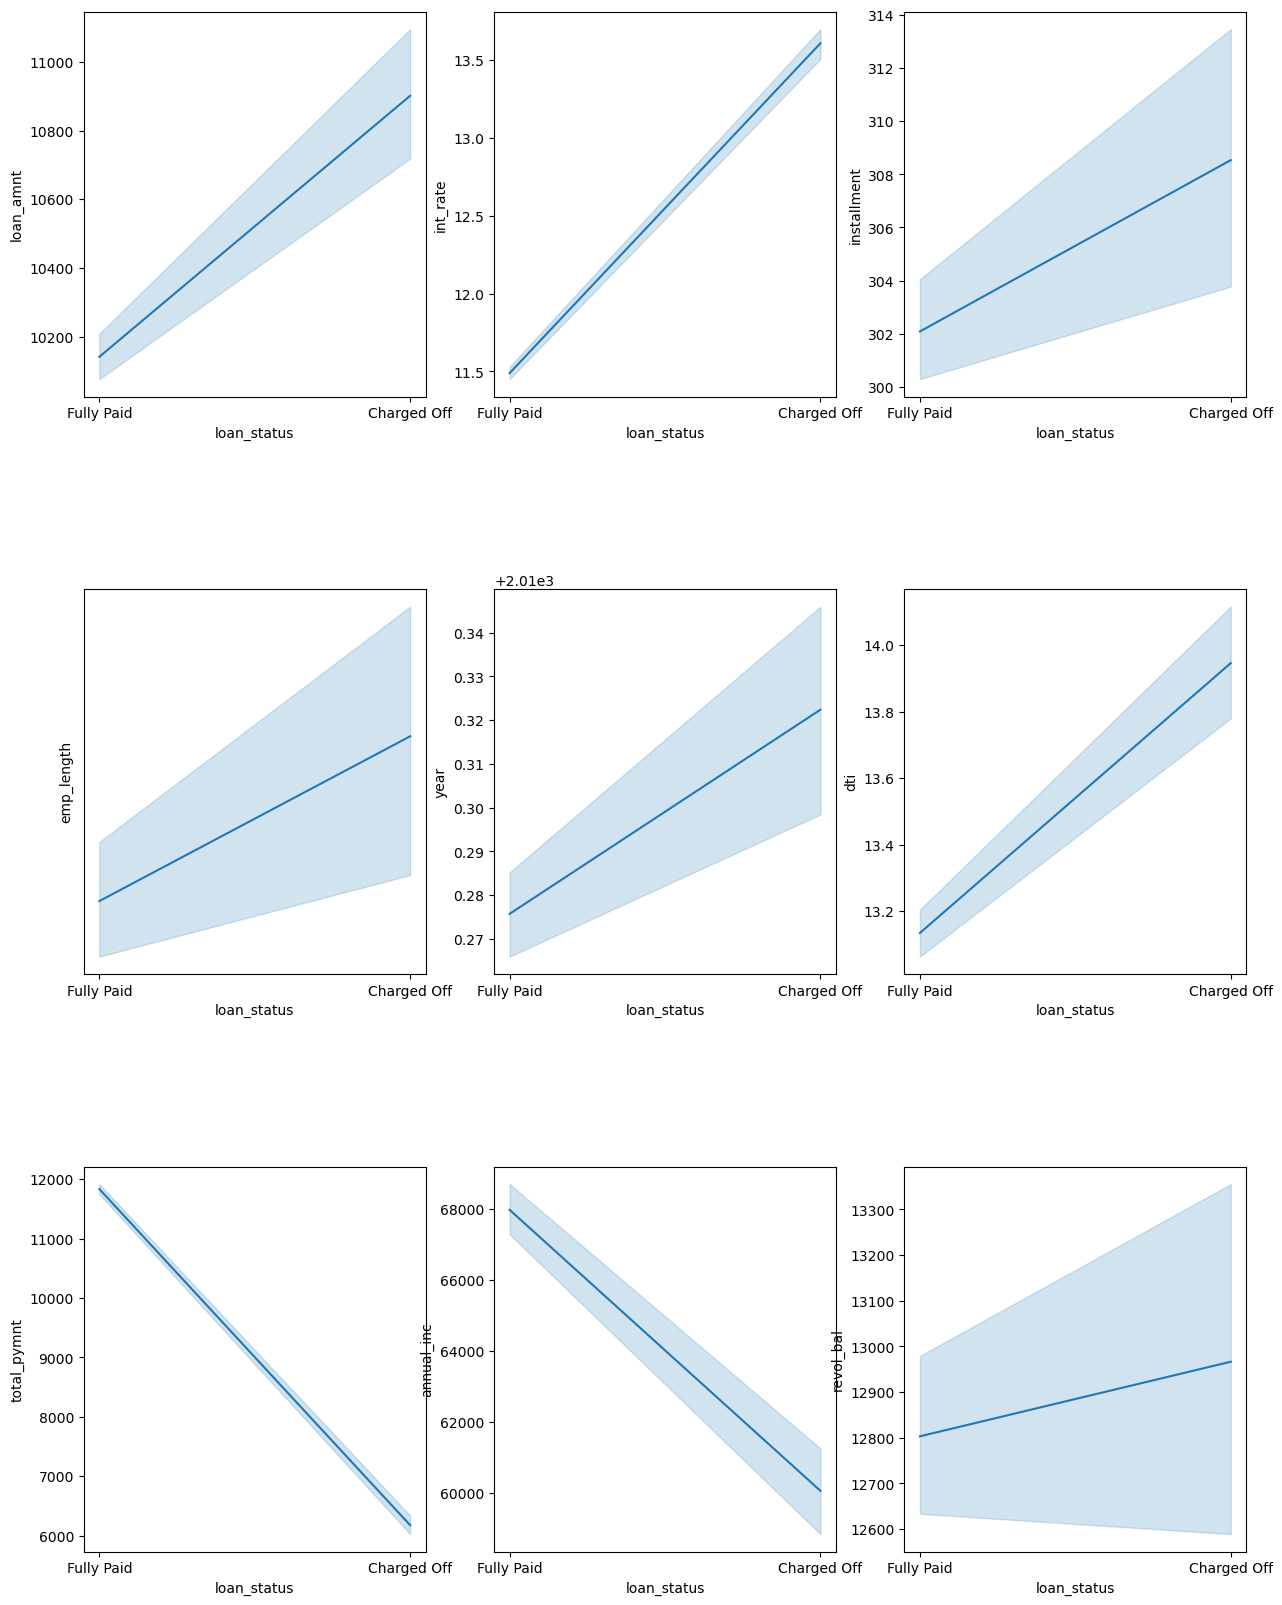

In [40]:
# Subplots [Line Plot] for bi variant analysis for all numerical variables against Loan_status 
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace = 0.5)
i = 1
for col in bivariate_columns:
    plt.subplot(3,3,i)
    sns.lineplot(x='loan_status',y=col, data=loans)
    #ax.bar_label(ax.containers[0], fmt='%.1f%%')
    i = i + 1
    #plt.xticks(rotation = 45)

##### Observation from Bivariate Analysis  
- When Loan Amount/interest rate/debt to income ration/employment Lenth increases then there is risk of getting defaulters 
- Members with low Debt to Income Ratio and high annual income have less tendency to get charged off

 

<AxesSubplot:>

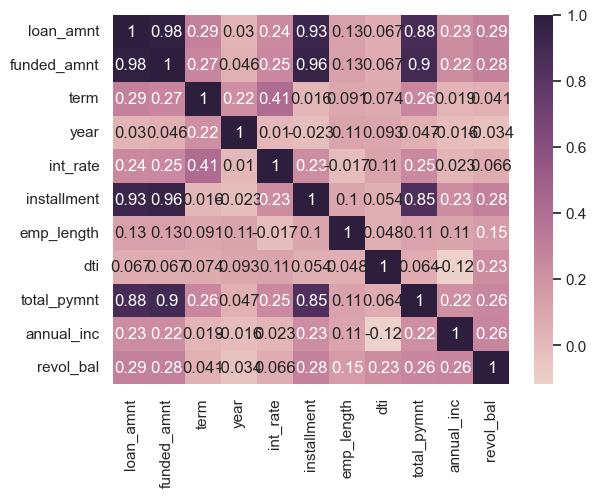

In [47]:
sns.set(font_scale=1)
sns.heatmap(loans[['loan_amnt', 'funded_amnt','term', 'year','int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'dti', 'verification_status', 'loan_status', 'total_pymnt', 'annual_inc', 'purpose', 'revol_bal']].corr(), annot=True,cmap=sns.cubehelix_palette(as_cmap=True))

# Overall Observation 

## When Loan Amount/interest rate/debt to income ration/employment Lenth increases then there is risk of getting defaulters
## Members with low Debt to Income Ratio and high annual income have less tendency to get charged off 